In [1]:
import math 
from PIL import Image, ImageDraw 
from matplotlib.pyplot import imshow

import matplotlib.pyplot as plt
import matplotlib.patches as patches




In [2]:

# example from training set
im = Image.open('frame_s1_18.jpg')

# Display the image
imshow(im)

# Get the current reference
ax = plt.gca()

# Create a Rectangle patch
#rect = Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

box_left = 670
box_top = 102
box_width = 72
box_height = 76

rect1 = patches.Rectangle((670,102),72,76,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((672,367),88,240,linewidth=1,edgecolor='r',facecolor='none')


# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

FileNotFoundError: [Errno 2] No such file or directory: 'frame_s1_18.jpg'

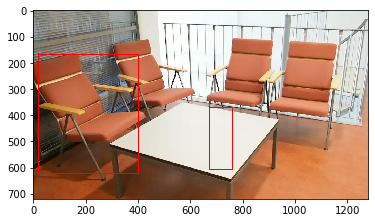

In [5]:

# image from testset
im = Image.open('frame_s3_562.jpg')

# Display the image
plt.imshow(im)

# Get the current reference
ax = plt.gca()

# Create a Rectangle patch
#rect = Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

#xmin
x1 = 17.1749

#ymin
y1 = 166.8839

#xmax
x2 = 400.5455

#ymax
y2 =620.0214

box_left = x1
box_top = y1
box_width = x2 - x1
box_height = y2 - y1

rect1 = patches.Rectangle((box_left,box_top),box_width,box_height,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((672,367),88,240,linewidth=1,edgecolor='r',facecolor='none')
rect3 = patches.Rectangle((670,102),72,76,linewidth=1,edgecolor='r',facecolor='none')
rect4 = patches.Rectangle((672,367),88,240,linewidth=1,edgecolor='r',facecolor='none')


# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

In [2]:
def show_boxes (image_name, boxes, labels):
    
    # convert tensor to list
    boxes_list = boxes.tolist()
    
    im = Image.open(image_name)

    # Display the image
    plt.imshow(im)

    # Get the current reference
    ax = plt.gca()
    
    i = 0
    for box in boxes_list:
        
        # get coordinates of the box
        xmin = box[0]

        ymin = box[1]

        xmax = box[2]

        ymax = box[3]
        
        # format the box 
        box_left = xmin
        box_top = ymin
        box_width = xmax - xmin
        box_height = ymax - ymin
        
        #label of the box
        lbl = labels[i]
        i = i + 1
        
        print("label is ", lbl)
        
        # draw rectangle on the image
        r =  patches.Rectangle((box_left,box_top),box_width,box_height,linewidth=1,edgecolor='r',facecolor='none', label='LABEL')
        
                
        # Add the patch to the Axes
        #ax.add_patch(rect)
        
        ax.add_artist(r)
        rx, ry = r.get_xy()
        cx = rx + r.get_width()/3.0
        cy = ry + r.get_height()/3.0

        ax.annotate(lbl, (cx, cy), color='w', weight='bold', 
                    fontsize=6, ha='center', va='center')

       

        
        

label is  chair
label is  chair
label is  chair
label is  chair


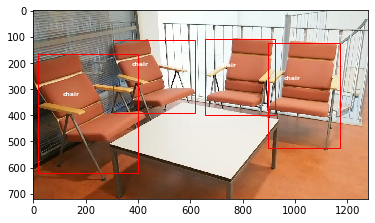

In [7]:
import torch

box_tensor = torch.FloatTensor([[  17.1749,  166.8839,  400.5455,  620.0214],[ 303.2294,  110.5817,  615.7012,  392.3192], [ 896.1959,  123.2261, 1172.0736,  523.4027], [ 656.9540,  110.0897,  924.2672,  400.1830]])
label_tensor = ['chair', 'chair', 'chair', 'chair']

show_boxes('frame_s3_562.jpg',box_tensor, label_tensor)

after model in run
label names is  ['fireextinguisher', 'exit', 'screen']
scores  [0.998891294002533, 0.9958101511001587, 0.08248159289360046]
show boxes called
type is  <class 'float'>
Lbl is  fireextinguisher
type is  <class 'float'>
Lbl is  exit
type is  <class 'float'>
Lbl is  screen


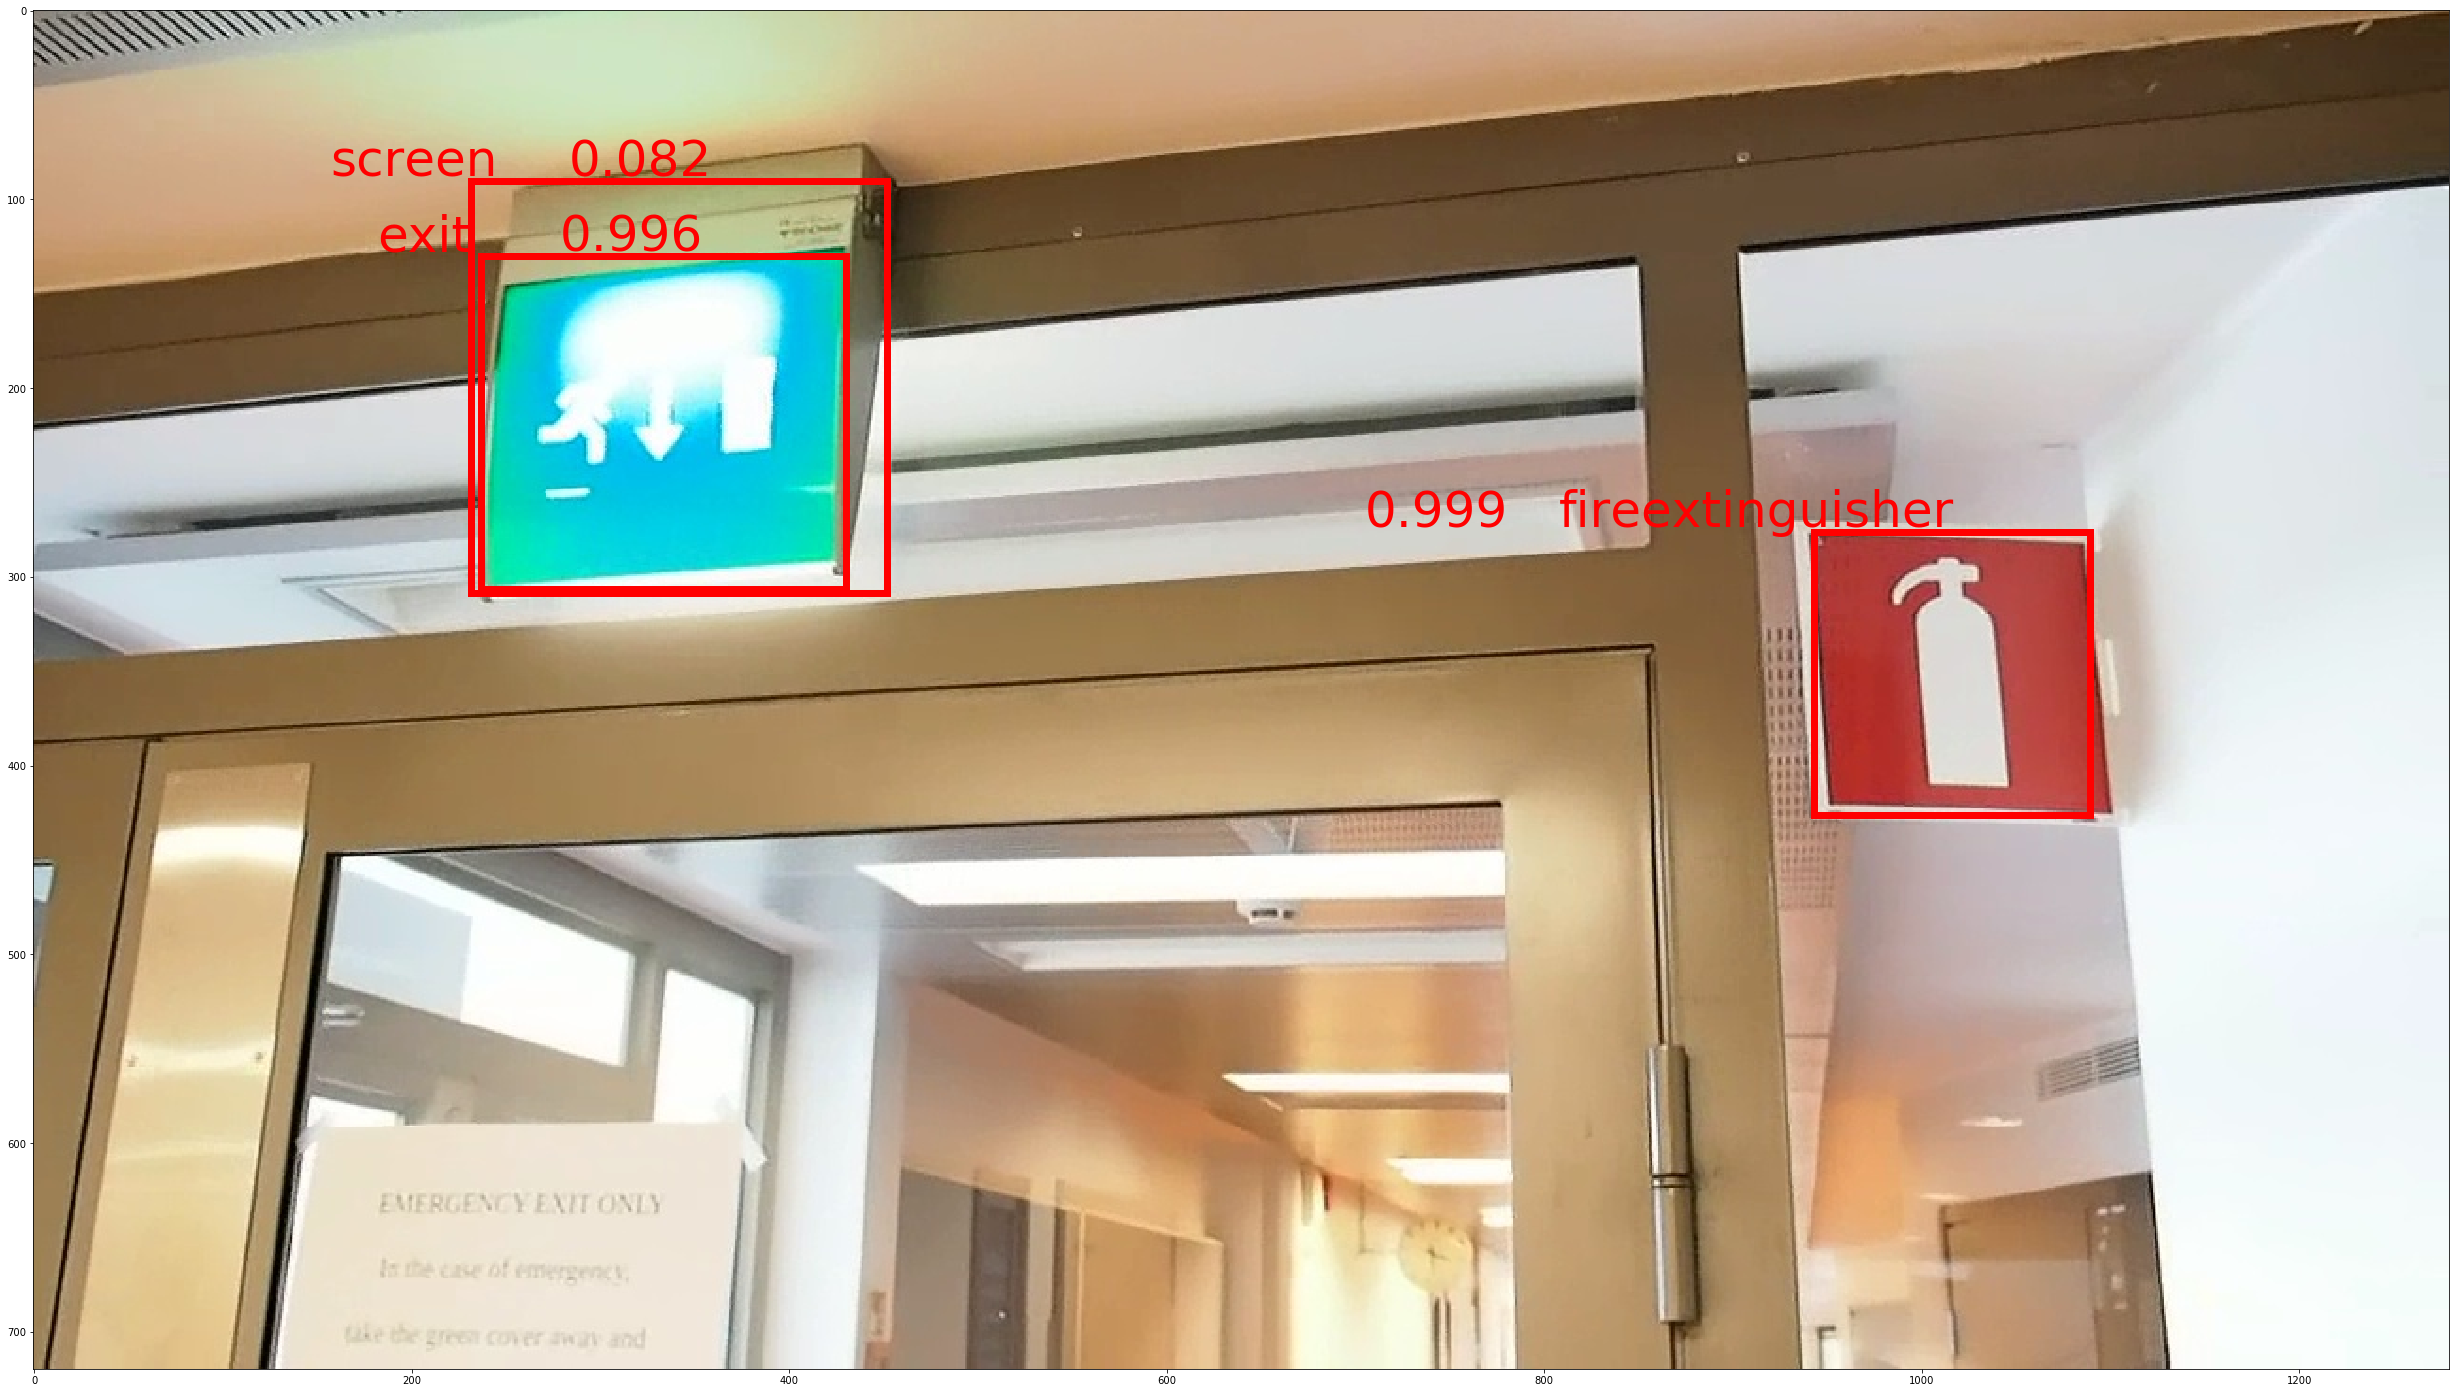

In [2]:
# same code from run.py

from predictor import predict
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import csv

def get_instance_segmentation_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model



file_write = open('try2.csv', mode='w', newline='')
writer = csv.writer(file_write)


"""
model = get_instance_segmentation_model(7)
print("after model in run")

model.load_state_dict(torch.load("result_model20200409-1856"))

model.eval()


#frame_s3_141.jpg
# exit_info.jpg
#frame_s5_151.jpg
# frame_s1_17.jpg
#frame_s1_28.jpg

predict(model, 'frame_s1_36.jpg', writer)
"""





"""
model2 = get_instance_segmentation_model(7)
print("after model in run")

model2.load_state_dict(torch.load("result_model"))

model2.eval()

predict(model2, 'exit_info.jpg')
"""

"""
#result_model20200617-1749
model3 = get_instance_segmentation_model(7)
print("after model in run")

model3.load_state_dict(torch.load("result_model20200617-1749"))

model3.eval()

predict(model3, 'frame_s5_151.jpg')
"""




# od testset frame_s5_6.jpg (Exit+feuerext)
#frame_s3_110.jpg  so speculiar highlight. exit + screen
model4 = get_instance_segmentation_model(8)
print("after model in run")

model4.load_state_dict(torch.load("result_model20200618-1216"))

model4.eval()

#Info/1.jpg
#Info/2.jpg
#frame_s1_36
#3
#7
#frame_s3_109
#frame_s2_170
#frame_s2_213
predict(model4, 'frame_s2_213.jpg',writer)




